In [45]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pickle
import torch

In [46]:
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

In [47]:
data_loader = pickle.load(open('../examples/test_set.pickl',"rb"))

In [48]:
data_iterator = iter(data_loader)

In [49]:
def nextImage():
    input_dict, label_dict = next(data_iterator)
    input_dict['external_rotation_global'] = torch.from_numpy(np.eye(3)).float().to(device)
    return input_dict, label_dict

In [71]:
def tensor_to_npimg(torch_array):
    return np.swapaxes(np.swapaxes(torch_array.numpy(), 0, 2), 0, 1)

def denormalize(np_array):
    #std then mean, from config file
    return np_array * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))

# extract image
def tensor_to_img(output_tensor):
    output_img = tensor_to_npimg(output_tensor)
    output_img = denormalize(output_img)
    output_img = np.clip(output_img, 0, 1)
    return output_img

In [50]:
input_dict, label_dict = nextImage()

In [51]:
len(input_dict)

5

In [52]:
len(label_dict)

7

In [53]:
input_dict['img_crop'].shape

torch.Size([2, 3, 128, 128])

In [54]:
input_dict['img_crop'][0,:].shape

torch.Size([3, 128, 128])

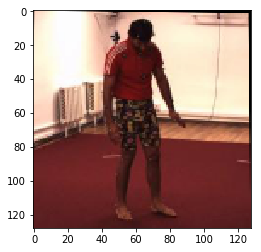

In [73]:
img_tensor = input_dict['img_crop'][1,:]
plt.imshow(tensor_to_img(img_tensor))

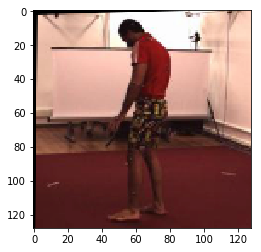

In [74]:
img_tensor = input_dict['img_crop'][0,:]
plt.imshow(tensor_to_img(img_tensor))

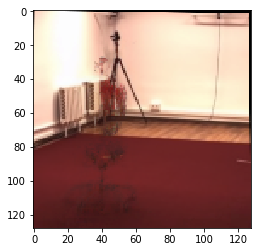

In [75]:
img_tensor = input_dict['bg_crop'][1,:]
plt.imshow(tensor_to_img(img_tensor))

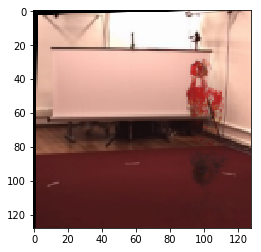

In [78]:
img_tensor = input_dict['bg_crop'][0,:]
plt.imshow(tensor_to_img(img_tensor))

In [79]:
input_dict.keys()

dict_keys(['img_crop', 'extrinsic_rot', 'extrinsic_rot_inv', 'bg_crop', 'external_rotation_global'])

In [80]:
label_dict.keys()

dict_keys(['3D', 'bounding_box_cam', 'intrinsic_crop', 'extrinsic_rot', 'extrinsic_rot_inv', 'pose_mean', 'pose_std'])

In [82]:
label_dict['bounding_box_cam']

tensor([[-0.3000, -0.2373,  0.3485,  0.3488],
        [-0.0982, -0.2406,  0.3410,  0.3416]])

In [83]:
label_dict['3D']

tensor([[ 0.0000,  0.0000,  0.0000,  0.0387, -0.0227,  0.1157, -0.0138,
          0.4422,  0.1792,  0.1241,  0.8893,  0.1531, -0.0387,  0.0227,
         -0.1157, -0.1582,  0.4770, -0.0671, -0.0760,  0.9380, -0.0485,
          0.0000,  0.0000,  0.0000, -0.0493, -0.4889,  0.0129, -0.1911,
         -0.6263,  0.0971, -0.1911, -0.6263,  0.0971, -0.0913, -0.4141,
         -0.1491, -0.1304, -0.1444, -0.2656, -0.2192,  0.0843, -0.2231,
          0.0282, -0.4078,  0.1578,  0.0908, -0.1394,  0.2668,  0.0117,
          0.0867,  0.3350],
        [ 0.0000,  0.0000,  0.0000, -0.0996,  0.0006, -0.0739, -0.0702,
          0.4706, -0.0386, -0.1447,  0.8829,  0.1714,  0.0996, -0.0006,
          0.0739,  0.1917,  0.4625,  0.0801,  0.1373,  0.9043,  0.2267,
          0.0000,  0.0000,  0.0000,  0.0079, -0.4650, -0.1593,  0.0676,
         -0.5638, -0.3403,  0.0676, -0.5638, -0.3403,  0.1397, -0.4255,
         -0.0382,  0.2526, -0.1874,  0.0973,  0.3118,  0.0529,  0.0700,
         -0.1350, -0.3611, -0.2082, 